## SET UP FILE TO RUN

In [1]:
! pip install xgboost


In [2]:
import pandas as pd
import sys
import os
import yaml
config_path = os.path.join("..", "config.yaml")
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)
sys.path.append(os.path.abspath(".."))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing requirements

In [3]:
from src.load_data import DataLoaderFactory
from src.handelling_missing_values import Impute
from analyse_src.missing_val_analysis import MissingValueAnalysisFactory
from src.preprocessing import PreprocessingFactory
from src.data_splitter import DataSpliter , SimpleTrainTestSplit
from src.model_building import ModelFactory
from src.model_evaluation import ModelEvaluationFactory
from analyse_src.conf import ConfusionAndReportVisualizer

In [4]:
tess_df=DataLoaderFactory().get_loader(".csv").load(r"C:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\data\TOI_2025.09.17_04.57.00.csv")

2025-10-03 14:35:21,615 -INFO - Loading data from C:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\data\TOI_2025.09.17_04.57.00.csv


In [5]:
tess_df.head()

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,raerr2,decstr,dec,decerr1,decerr2,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmrasymerr,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,st_pmdecsymerr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidsymerr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpersymerr,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandurhsymerr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepsymerr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radesymerr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolsymerr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtsymerr,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_tmagsymerr,st_dist,st_disterr1,st_disterr2,st_distlim,st_distsymerr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffsymerr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,NaN,-12d41m45.46s,-12.695960,NaN,NaN,-5.964,0.085,-0.085,0.0,1.0,-0.076,0.072,-0.072,0.0,1.0,2.459230e+06,0.001657,-0.001657,0,1,2.171348,0.000264,-0.000264,0,1,2.01722,0.319588,-0.319588,0,1,656.886099,37.778210,-37.778210,0,1,5.818163,1.910546,-1.910546,0,1,22601.948581,NaN,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,NaN,9.604000,0.013,-0.013,0,1,485.735,11.9515,-11.9515,0,1,10249.0,264.7,-264.7,0,1,4.19,0.07,-0.07,0,1,2.16986,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,NaN,-05d30m49.87s,-5.513852,NaN,NaN,-4.956,0.102,-0.102,0.0,1.0,-15.555,0.072,-0.072,0.0,1.0,2.459988e+06,0.001916,-0.001916,0,1,1.931646,0.000005,-0.000005,0,1,3.16600,0.647000,-0.647000,0,1,1286.000000,1186.490000,-1186.490000,0,1,11.215400,2.624200,-2.624200,0,1,44464.500000,NaN,NaN,NaN,NaN,4045.000000,NaN,NaN,NaN,NaN,9.423440,0.006,-0.006,0,1,295.862,5.9100,-5.9100,0,1,7070.0,126.4,-126.4,0,1,4.03,0.09,-0.09,0,1,2.01000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,NaN,-10d34m49.64s,-10.580455,NaN,NaN,-1.462,0.206,-0.206,0.0,1.0,-2.249,0.206,-0.206,0.0,1.0,2.459225e+06,0.000625,-0.000625,0,1,1.867557,0.000003,-0.000003,0,1,1.40800,0.184000,-0.184000,0,1,1500.000000,1.758400,-1.758400,0,1,23.752900,NaN,NaN,0,1,2860.610000,NaN,NaN,NaN,NaN,2037.000000,NaN,NaN,NaN,NaN,9.299501,0.058,-0.058,0,1,943.109,106.3330,-106.3330,0,1,8924.0,124.0,-124.0,0,1,NaN,NaN,NaN,0,1,5.73000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,NaN,NaN,-25d12m25.26s,-25.207017,NaN,NaN,-0.939,0.041,-0.041,0.0,1.0,1.640,0.055,-0.055,0.0,1.0,2.458493e+06,0.005350,-0.005350,0,1,2.743230,0.001080,-0.001080,0,1,3.16700,0.642000,-0.642000,0,1,383.410000,0.781988,-0.781988,0,1,NaN,NaN,NaN,0,1,1177.360000,NaN,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,NaN,9.300300,0.037,-0.037,0,1,7728.170,1899.5700,-1899.5700,0,1,5388.5,567.0,-567.0,0,1,4.15,1.64,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,NaN,-48d48m10.12s,-48.802811,NaN,NaN,-4.496,0.069,-0.069,0.0,1.0,9.347,0.062,-0.062,0.0,1.0,2.459987e+06,0.003748,-0.003748,0,1,3.573014,0.000013,-0.000013,0,1,3.37000,1.029000,-1.029000,0,1,755.000000,1306.550000,-1306.550000,0,1,11.311300,3.247140,-3.247140,0,1,54679.300000,NaN,NaN,NaN,NaN,4260.000000,NaN,NaN,NaN,NaN,9.135500,0.006,-0.006,0,1,356.437,4.6175,-4.6175,0,1,9219.0,171.1,-171.1,0,1,4.14,0.07,-0.07,0,1,2.15000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01


In [6]:
print(f"Shape of the dataframe before handelling missing values: {tess_df.shape}")

Shape of the dataframe before handelling missing values: (7668, 87)


## **Handelling NAN Values and duplicate**

2025-10-03 14:35:21,816 -INFO - Missing Value Report:
         Column  Missing Values  Percentage
         raerr1            7668  100.000000
        decerr1            7668  100.000000
         raerr2            7668  100.000000
        decerr2            7668  100.000000
   pl_eqtsymerr            7668  100.000000
   pl_insolerr1            7668  100.000000
 pl_insolsymerr            7668  100.000000
    pl_insollim            7668  100.000000
   pl_insolerr2            7668  100.000000
     pl_eqterr1            7668  100.000000
     pl_eqterr2            7668  100.000000
      pl_eqtlim            7668  100.000000
    st_loggerr1            2257   29.434011
    st_loggerr2            2257   29.434011
     st_raderr1            1950   25.430360
     st_raderr2            1950   25.430360
    pl_radeerr2            1622   21.152843
    pl_radeerr1            1622   21.152843
        st_logg             856   11.163276
    st_disterr2             706    9.207094
    st_disterr1       

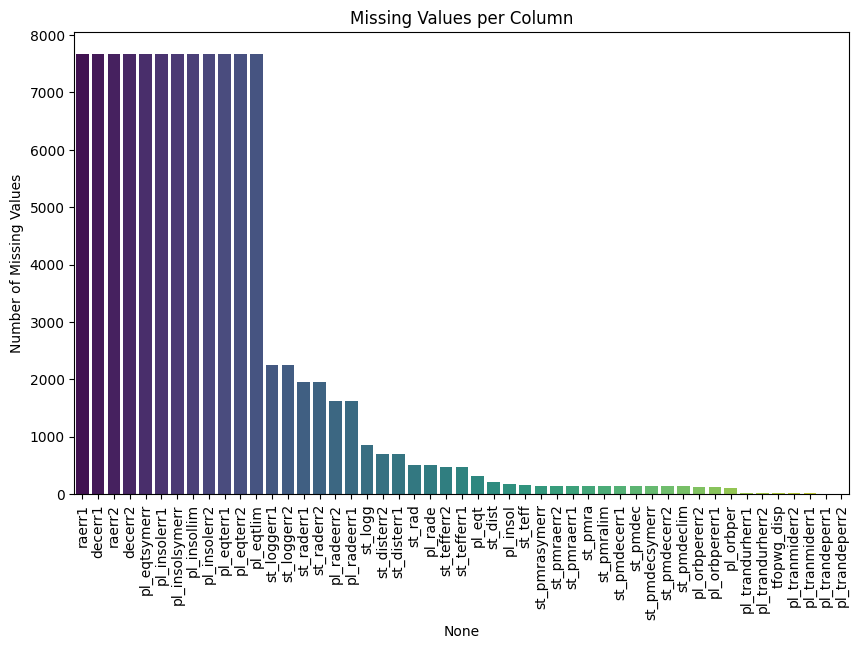

2025-10-03 14:35:22,527 -INFO - Missing value analysis completed and visualized.


In [7]:
missing_val_analysis=MissingValueAnalysisFactory().get_analyzer("report").analyze(tess_df)
missing_val_analysis_visualize=MissingValueAnalysisFactory().get_analyzer("visualize").analyze(tess_df)

In [8]:
tess_fill_nan=Impute().fill_na().handle(tess_df)
print("Null value present :",True if tess_fill_nan.isnull().values.any() else False)


2025-10-03 14:35:22,539 -INFO - Imputing missing values with mean for numerical columns and mode for categorical columns
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\src\handelling_missing_values.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)
2025-10-03 14:35:22,546 -INFO - Dropping column :raerr1 --> 100.0% missing
2025-10-03 14:35:22,552 -INFO - Dropping column :raerr2 --> 100.0% missing
2025-10-03 14:35:22,555 -INFO - Dropping column :decerr1 --> 100.0% missi

Null value present : False


In [9]:
tess_fill_nan=Impute().handle_duplicates().handle(tess_fill_nan)
print("Duplicated columns:", True if tess_fill_nan.columns.duplicated().any() else False)

2025-10-03 14:35:22,674 -INFO - Removed 0 duplicate rows


Duplicated columns: False


In [10]:
tess_fill_nan.sample(3)

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmrasymerr,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,st_pmdecsymerr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidsymerr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpersymerr,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandurhsymerr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepsymerr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radesymerr,pl_insol,pl_eqt,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_tmagsymerr,st_dist,st_disterr1,st_disterr2,st_distlim,st_distsymerr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffsymerr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
3544,3545,4079.01,4079,444558604,4.445586e+08,1,PC,01h19m55.4s,19.980843,+64d32m16.99s,64.538054,18.093,0.038,-0.038,0.0,1.0,0.909,0.041,-0.041,0.0,1.0,2.459883e+06,0.000561,-0.000561,0,1,1.987226,0.000007,-0.000007,0,1,2.486000,0.071000,-0.071000,0,1,19450.000000,2.519950,-2.519950,0,1,15.611200,0.765135,-0.765135,0,1,1292.250000,1670.000000,12.1484,0.030,-0.030,0,1,360.7600,3.57800,-3.57800,0,1,6178.0,242.900,-242.900,0,1,4.44000,0.090000,-0.090000,0,1,1.08000,0.050000,-0.050000,0,1,2021-06-23 15:26:09,2024-08-22 10:08:01
6739,6740,6902.01,6902,167656187,1.676562e+08,1,PC,06h50m01.03s,102.504272,-60d14m55.24s,-60.248678,4.663,0.084,-0.084,0.0,1.0,108.377,0.089,-0.089,0.0,1.0,2.458358e+06,0.000856,-0.000856,0,1,36.435859,0.000035,-0.000035,0,1,9.252253,0.067524,-0.067524,0,1,384.044182,18.436415,-18.436415,0,1,2.874372,0.164951,-0.164951,0,1,58.289507,704.721213,5.6801,0.006,-0.006,0,1,34.0071,0.04790,-0.04790,0,1,6597.0,140.298,-140.298,0,1,4.28305,0.089880,-0.089880,0,1,1.40426,0.065163,-0.065163,0,1,2024-02-15 23:13:00,2024-02-16 12:02:59
1274,1275,2072.01,2072,900715901,9.007159e+08,1,PC,11h35m56.77s,173.986546,+75d32m47.86s,75.546629,-185.008,0.056,-0.056,0.0,1.0,-87.324,0.050,-0.050,0.0,1.0,2.459636e+06,0.003089,-0.003089,0,1,3.167981,0.000018,-0.000018,0,1,1.352000,0.233000,-0.233000,0,1,970.000000,3.235040,-3.235040,0,1,10.337205,1.463477,-1.463477,0,1,31.751900,661.000000,11.6434,0.006,-0.006,0,1,39.1185,0.04905,-0.04905,0,1,3546.0,119.826,-119.826,0,1,4.93943,0.173715,-0.173715,0,1,1.40436,0.074645,-0.074645,0,1,2020-07-15 20:44:30,2022-07-08 16:02:01


## **Preprocessing Data**

In [11]:
preprocess=PreprocessingFactory().get_preprocessor("remove_columns",columns_to_remove=config["tess_data"]["remove_columns"]).preprocess(tess_fill_nan)

2025-10-03 14:35:22,734 -INFO - Removing columns: ['rowid', 'toi', 'st_pmralim', 'st_pmrasymerr', 'st_pmdeclim', 'st_pmdecsymerr', 'pl_tranmidlim', 'pl_tranmidsymerr', 'pl_orbperlim', 'pl_orbpersymerr', 'pl_trandurhlim', 'pl_trandurhsymerr', 'pl_trandeplim', 'pl_trandepsymerr', 'pl_radelim', 'pl_radesymerr', 'st_tmaglim', 'st_tmagsymerr', 'st_distlim', 'st_distsymerr', 'st_tefflim', 'st_teffsymerr', 'st_logglim', 'st_loggsymerr', 'st_radlim', 'st_radsymerr', 'toipfx', 'tid', 'ctoi_alias', 'pl_pnum', 'rastr', 'decstr', 'toi_created', 'rowupdate']
2025-10-03 14:35:22,739 -INFO - Columns removed successfully


In [12]:
process_target_encode=PreprocessingFactory().get_preprocessor("map_values",column_name=config["tess_data"]["target_column"],mapping_dict=config["tess_data"]["target_map_values"]).preprocess(preprocess)

2025-10-03 14:35:22,749 -INFO - Mapping values in column: tfopwg_disp
2025-10-03 14:35:22,751 -INFO - Values mapped successfully


In [13]:
process_target_encode.head()

,tfopwg_disp,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmdec,st_pmdecerr1,st_pmdecerr2,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_insol,pl_eqt,st_tmag,st_tmagerr1,st_tmagerr2,st_dist,st_disterr1,st_disterr2,st_teff,st_tefferr1,st_tefferr2,st_logg,st_loggerr1,st_loggerr2,st_rad,st_raderr1,st_raderr2
0,0,112.357708,-12.695960,-5.964,0.085,-0.085,-0.076,0.072,-0.072,2.459230e+06,0.001657,-0.001657,2.171348,0.000264,-0.000264,2.01722,0.319588,-0.319588,656.886099,37.778210,-37.778210,5.818163,1.910546,-1.910546,22601.948581,3127.204052,9.604000,0.013,-0.013,485.735,11.9515,-11.9515,10249.0,264.7,-264.7,4.19,0.070000,-0.070000,2.16986,0.072573,-0.072573
1,2,122.580465,-5.513852,-4.956,0.102,-0.102,-15.555,0.072,-0.072,2.459988e+06,0.001916,-0.001916,1.931646,0.000005,-0.000005,3.16600,0.647000,-0.647000,1286.000000,1186.490000,-1186.490000,11.215400,2.624200,-2.624200,44464.500000,4045.000000,9.423440,0.006,-0.006,295.862,5.9100,-5.9100,7070.0,126.4,-126.4,4.03,0.090000,-0.090000,2.01000,0.090000,-0.090000
2,0,104.726966,-10.580455,-1.462,0.206,-0.206,-2.249,0.206,-0.206,2.459225e+06,0.000625,-0.000625,1.867557,0.000003,-0.000003,1.40800,0.184000,-0.184000,1500.000000,1.758400,-1.758400,23.752900,1.463477,-1.463477,2860.610000,2037.000000,9.299501,0.058,-0.058,943.109,106.3330,-106.3330,8924.0,124.0,-124.0,4.33,0.175205,-0.175205,5.73000,0.074645,-0.074645
3,0,110.559945,-25.207017,-0.939,0.041,-0.041,1.640,0.055,-0.055,2.458493e+06,0.005350,-0.005350,2.743230,0.001080,-0.001080,3.16700,0.642000,-0.642000,383.410000,0.781988,-0.781988,10.337205,1.463477,-1.463477,1177.360000,1631.000000,9.300300,0.037,-0.037,7728.170,1899.5700,-1899.5700,5388.5,567.0,-567.0,4.15,1.640000,-1.640000,1.40436,0.074645,-0.074645
4,0,122.178195,-48.802811,-4.496,0.069,-0.069,9.347,0.062,-0.062,2.459987e+06,0.003748,-0.003748,3.573014,0.000013,-0.000013,3.37000,1.029000,-1.029000,755.000000,1306.550000,-1306.550000,11.311300,3.247140,-3.247140,54679.300000,4260.000000,9.135500,0.006,-0.006,356.437,4.6175,-4.6175,9219.0,171.1,-171.1,4.14,0.070000,-0.070000,2.15000,0.060000,-0.060000


## **Split data**

In [14]:
process_target_encode.tfopwg_disp.value_counts()

tfopwg_disp
2    4693
0    1743
1    1232
Name: count, dtype: int64

In [15]:
process_target_encode.columns

Index(['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2',
       'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid',
       'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2',
       'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_insol', 'pl_eqt', 'st_tmag',
       'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_loggerr1',
       'st_loggerr2', 'st_rad', 'st_raderr1', 'st_raderr2'],
      dtype='object')

In [16]:
x_train,x_test,y_train,y_test=DataSpliter(SimpleTrainTestSplit(test_size=config["data_splitter"]["test_size"],random_state=config["data_splitter"]["random_state"])).split(process_target_encode,config["tess_data"]["target_column"])

2025-10-03 14:35:22,826 -INFO - Splitting data..
2025-10-03 14:35:22,829 -INFO - Performing simple Train-Test-Split.
2025-10-03 14:35:22,836 -INFO - Train-Test-Split completed.


In [17]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")   
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (6134, 40)
Shape of x_test: (1534, 40)
Shape of y_train: (6134,)
Shape of y_test: (1534,)


## Confusion matrix and report

In [18]:
model=ModelFactory().get_model("xgboost").build_model(x_train,y_train)

2025-10-03 14:35:22,855 -INFO - Building SVM model
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:35:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025-10-03 14:35:31,845 -INFO - Model training completed


In [19]:
ModelEvaluationFactory().get_evaluator("accuracy").evaluate(model,"Train",x_train,y_train)
ModelEvaluationFactory().get_evaluator("accuracy").evaluate(model,"test",x_test,y_test)


2025-10-03 14:35:31,863 -INFO - Evaluating model using accuracy score
2025-10-03 14:35:32,435 -INFO - Train Evaluation Metrics: {'accuracy': 0.9993478969677209, 'precision_macro': 0.9996428252522547, 'recall_macro': 0.9989561015874102, 'f1_macro': 0.9992989065565251, 'precision_weighted': 0.9993485957119291, 'recall_weighted': 0.9993478969677209, 'f1_weighted': 0.9993477706277224}
2025-10-03 14:35:32,435 -INFO - Model evaluation completed
2025-10-03 14:35:32,465 -INFO - Train Evaluation Metrics: {'accuracy': 0.9993478969677209, 'precision_macro': 0.9996428252522547, 'recall_macro': 0.9989561015874102, 'f1_macro': 0.9992989065565251, 'precision_weighted': 0.9993485957119291, 'recall_weighted': 0.9993478969677209, 'f1_weighted': 0.9993477706277224}
2025-10-03 14:35:32,467 -INFO - Model evaluation completed
2025-10-03 14:35:32,505 -INFO - Train Evaluation Metrics: {'accuracy': 0.9993478969677209, 'precision_macro': 0.9996428252522547, 'recall_macro': 0.9989561015874102, 'f1_macro': 0.9992

{'accuracy': 0.7757496740547588,
 'precision_macro': 0.7422353030799288,
 'recall_macro': 0.6820312020424854,
 'f1_macro': 0.7066273303690868,
 'precision_weighted': 0.7694294618477894,
 'recall_weighted': 0.7757496740547588,
 'f1_weighted': 0.7685337002693853}

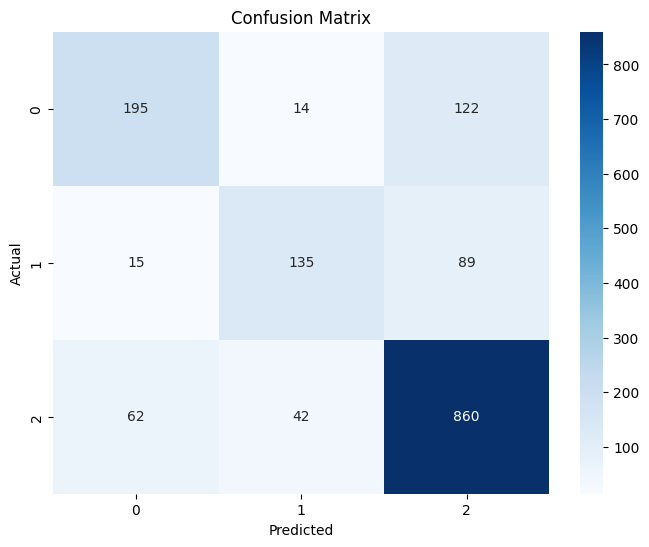

2025-10-03 14:35:33,505 -INFO - Confusion matrix plotted successfully.
2025-10-03 14:35:33,666 -INFO - Classification report generated successfully.


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65       331
           1       0.71      0.56      0.63       239
           2       0.80      0.89      0.85       964

    accuracy                           0.78      1534
   macro avg       0.74      0.68      0.71      1534
weighted avg       0.77      0.78      0.77      1534



In [20]:
ConfusionAndReportVisualizer().get_confusion_matrix_visualizer().plot(y_test,model.predict(x_test),labels=[0,1,2])
ConfusionAndReportVisualizer().get_classification_report_visualizer().plot(y_test,model.predict(x_test))